# 1A.e - Enoncé 12 décembre 2017 (2)

Correction du premier énoncé de l'examen du 12 décembre 2017. Celui-ci mène à l'implémentation d'un algorithme qui permet d'approximer une fonction $f$ par une fonction en escalier à partir d'un ensemble de points $(X_i, f(X_i))$.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Q1 - échantillon aléatoire

Générer un ensemble aléatoire de 1000 nombres $(X_i,Y_i)$ qui vérifie :

* $X_i$ suit une loi uniforme sur $[0,16]$
* $Y_i = \sqrt{X_i}[\sqrt{X_i}]$ où $[A]$ est la partie entière de $A$.

On pourra se servir de la fonction ``random`` du module ``random``.

In [2]:
import random
X = [random.random() * 16 for i in range(0,1000)]
Y = [ x**0.5 * int(x**0.5) for x in X]

## Q1 - dessiner le nuage de points - donnée

Le code suivant vous est donné afin de vérifier vos réponses.

In [3]:
%matplotlib inline

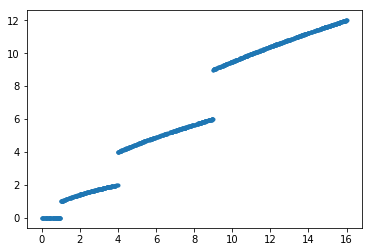

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, Y, '.')

## Q2 - tri

Trier les points selon les $X$.

In [5]:
nuage = [(x,y) for x,y in zip(X,Y)]
nuage.sort()

## Q3 - moyenne

On suppose que les $Y$ sont triés selon les $X$ croissants.
Calculer la moyenne des différences entre $Y$ et la moyenne $m$ des $Y$
(en valeur absolue) sur un intervalle $[i,j]$, $j$ exclu.
Ecrire une fonction ``def somme_diff(nuage, i, j)`` qui exécute ce calcul
qui correspond à $\sum_{k=i}^j (Y_k - m)^2$ avec $m = (\sum_{k=i}^j Y_k) / (j-i)$.

In [6]:
def somme_diff(xy, i, j):
    m = sum(e[1] for e in xy[i:j]) / (j-i)
    return sum((e[1]-m)**2 for e in xy[i:j])

somme_diff(nuage, 0, 5), somme_diff(nuage, 0, len(nuage))

(0.0, 15754.105018618644)

## Q4 - distance

Soit $i,j$ deux entiers, on coupe l'intervalle en deux : $i,k$ et $k,j$. On calcule la ``somme_diff`` sur ces deux intervalles, on fait la somme des différences (en valeurs absolues) de ces moyennes par rapport à la valeur sur le plus grand intervalle. On écrit la fonction ``def difference(nuage, i, j, k):``.

In [7]:
def difference(nuage, i, j, k):
    m1 = somme_diff(nuage, i, k)
    m2 = somme_diff(nuage, k, j)
    m = somme_diff(nuage, i, j)
    return abs(m-m1) + abs(m-m2)

difference(nuage, 0, len(nuage), 100)

19898.600443365925

## Q5 - fonction comme paramètre

Le langage Python permet de passer une fonction à une autre fonction en tant qu'argument. Un exemple :

In [8]:
def fct(x, y):
    return abs(x-y)

def distance_list(list_x, list_y, f):
    return sum(f(x,y) for x,y in zip(list_x, list_y))

distance_list([0, 1], [0, 2], fct)

1

Ecrire la fonction précédente en utilisant la fonction ``fct``.

In [9]:
def somme_diff(xy, i, j, f):
    m = sum(e[1] for e in xy[i:j]) / (j-i)
    return sum(f(e[1], m) for e in xy[i:j])

def difference(nuage, i, j, k, f):
    m1 = somme_diff(nuage, i, k, f)
    m2 = somme_diff(nuage, k, j, f)
    m = somme_diff(nuage, i, j, f)
    return abs(m1 + m2 - m)

difference(nuage, 0, len(nuage), 100, fct)

552.6383487080093

## Q6 - optimiser

On veut déterminer le $i$ optimal, celui qui maximise la différence dans l'intervalle $[i,j]$. On souhaite garder la fonction ``fct`` comme argument. Pour cela, implémenter la fonction ``def optimise(nuage, i, j, f):``.

In [10]:
def optimise(nuage, i, j, f):
    mx = -1
    ib = None
    for k in range(i+1,j-1):
        d = difference(nuage, i,j,k, f)
        if ib is None or d > mx:
            mx = d
            ib = k
    return ib, mx

optimise(nuage, 0, len(nuage), fct)

(553, 2184.8079894060775)

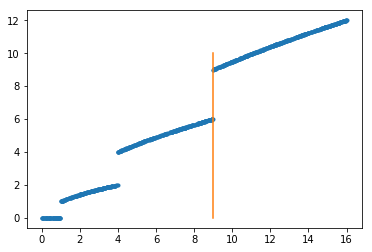

In [11]:
import matplotlib.pyplot as plt
x = nuage[553][0]
plt.plot(X,Y,'.')
plt.plot([x,x], [0,10])

## Q7 - optimisation encore

Recommencer sur les deux intervalles trouvés

In [12]:
optimise(nuage, 0, 570, fct), optimise(nuage, 570, len(nuage), fct)

((253, 787.5154656398129), (789, 156.7106930739271))

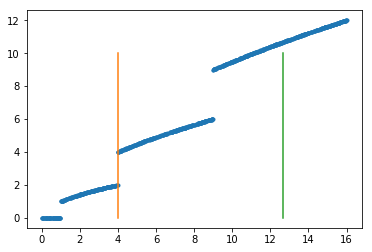

In [13]:
import matplotlib.pyplot as plt
x = nuage[253][0]
x2 = nuage[789][0]
plt.plot(X,Y,'.')
plt.plot([x,x], [0,10])
plt.plot([x2,x2], [0,10])

## Q8 - fonction récursive

Pouvez-vous imaginer une fonction récursive qui produit toutes les séparations. Ecrire la fonction ``def recursive(nuage, i, j, f, th=0.1):``. La fonction ``recursive`` tente de placer chaque point dans un intervalle distinct et elle échoue car elle dépasse le nombre d'appels récursifs autorisés par le langage Python.

In [14]:
def recursive(nuage, i, j, f):
    if i+1 == j or i == j:
        return [i]
    k, mx = optimise(nuage, i, j, f)
    if k is None:
        return None
    else:
        r1 = recursive(nuage, i, k, f)
        r2 = recursive(nuage, k, j, f)        
        if r1 is None and r2 is None:
            return [k]
        elif r1 is None:
            return [k] + r2
        elif r2 is None:
            return r1 + [k]
        else:
            return r1 + [k] + r2

# déclenche une exception
r = recursive(nuage, 0, len(nuage), fct)
len(r), r[:5], r[-5:]

(946, [0, 1, 1, 2, 2], [996, 996, 997, 997, 998])

La fonction n'est pas encore parfait et elle retourne plusieurs fois le même point de coupure mais ce n'est pas le plus grave car la fonction retourne quasiment tous les points.

## Q9 - seuil

L'algorithme produit beaucoup de points de coupures. On souhaite arrêter la récursion plus tôt en mettant un seuil sur la quantité obtenue $|\Delta_{i}^k + \Delta_{k}^j - \Delta_{i}^j|$ qui doit être supérieur à 50.

In [15]:
def recursive(nuage, i, j, f, th=50):
    k, mx = optimise(nuage, i, j, f)
    if mx <= th:
        return None
    r1 = recursive(nuage, i, k, f, th=th)
    r2 = recursive(nuage, k, j, f, th=th)
    if r1 is None and r2 is None:
        return [k]
    elif r1 is None:
        return [k] + r2
    elif r2 is None:
        return r1 + [k]
    else:
        return r1 + [k] + r2
    
r = recursive(nuage, 0, len(nuage), fct)
len(r), r[:5]

(5, [61, 253, 384, 553, 782])

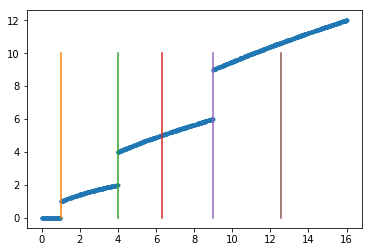

In [16]:
import matplotlib.pyplot as plt
plt.plot(X, Y, '.')
for i in r:
    x = nuage[i][0]
    plt.plot([x,x], [0,10])

## Q10 - coût

Quel est le coût de la fonction ``optimize`` en fonction de la taille de l'intervalle ? Peut-on mieux faire  (ce qu'on n'implémentera pas).

Tel qu'il est implémenté, le coût est en $O(n^2)$, le coût peut être linéaire en triant les éléments dans l'ordre croissant, ce qui a été fait, ou $n\ln n$ si on inclut le coût du tri bien qu'on ne le fasse qu'une fois. Voyons plus en détail comment se débarrasser du coût en $O(n^2)$. Tout d'abord la version actuelle.

In [17]:
def somme_diff2(xy, i, j):
    m = sum(e[1] for e in xy[i:j]) / (j-i)
    return sum((e[1]-m)**2 for e in xy[i:j])

def difference2(nuage, i, j, k):
    m1 = somme_diff2(nuage, i, k)
    m2 = somme_diff2(nuage, k, j)
    m = somme_diff2(nuage, i, j)
    return abs(m1+m2-m)

def optimise2(nuage, i, j):
    mx = -1
    ib = None
    for k in range(i+1,j-1):
        d = difference2(nuage, i,j,k)
        if ib is None or d > mx:
            mx = d
            ib = k
    if ib is None:
        ib = i
        mx = 0
    return ib, mx

%timeit optimise2(nuage, 0, len(nuage))

628 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


L'instruction suivante permet de voir où le programme passe la majeure partie de son temps.

In [18]:
# %prun optimise_abs(nuage, 0, len(nuage))

La fonction [sum](https://docs.python.org/3/library/functions.html#sum) cache une boucle, avec la boucle ``for`` dans la fonction ``optimise``, cela explique le coût en $O(n^2)$. Le fait qu'à chaque itération, on passe une observation d'un côté à l'autre de la coupure puis on recalcule les moyennes... Nous allons optimiser ce calcul en tenant compte du fait que la fonction de coût est $f(x,y) = (x-y)^2$. Il faut également se souvenir de la formule $\mathbb{V}X = \mathbb{E}(X^2) - (\mathbb{E}X)^2$ ce qu'on transforme en $\sum_{i=1}^n (X_i-M)^2 = \sum_{i=1}^n X_i^2 - n M^2$ avec $M = \frac{1}{n} \sum_{i=1}^n X_i$.

In [19]:
def optimise_rapide(nuage, i, j):
    # On calcule les histogrammes.
    Y = sum(y for x,y in nuage)
    Y_1 = sum(y for x,y in nuage[i:i+1])
    Y_2 = sum(y for x,y in nuage[i+1:j])
    Y2 = sum(y**2 for x,y in nuage)
    Y2_1 = sum(y**2 for x,y in nuage[i:i+1])
    Y2_2 = sum(y**2 for x,y in nuage[i+1:j])
    
    m = Y2 - Y**2 / len(nuage)
    m1 = Y2_1 - Y_1**2
    m2 = Y2_2 - Y_2**2/(len(nuage)-1)
    mx = -1
    ib = None
    for k in range(i+1,j-1):
        d = abs(m1+m2-m)
        if ib is None or d > mx:
            mx = d
            ib = k
        # On met à jour les sommes Y?_?
        y = nuage[k][1] 

        Y_1 += y
        Y_2 -= y
        Y2_1 += y**2
        Y2_2 -= y**2
        
        m1 = Y2_1 - Y_1**2 / (k-i+1)
        m2 = Y2_2 - Y_2**2 / (j-k-1)
        
    if ib is None:
        ib = i
        mx = 0
    return ib, mx

# On vérifie qu'on obtient les mêmes résultats.
optimise_rapide(nuage, 0, len(nuage)), optimise2(nuage, 0, len(nuage))

((553, 13082.574312018376), (553, 13082.574312018447))

In [20]:
%timeit optimise_rapide(nuage, 0, len(nuage))

1.77 ms ± 43.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Carrément plus rapide.